### Import Module 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
import glob
import re

import warnings
warnings.filterwarnings('ignore')

### Read File 

In [3]:
files_list = glob.glob('*.csv')

In [4]:
files_list

['test_features_2013-03-07.csv',
 'train_features_2013-03-07.csv',
 'train_salaries_2013-03-07.csv']

In [5]:
df_train_features = pd.read_csv(files_list[1])
df_test_features = pd.read_csv(files_list[0])
df_train_salaries = pd.read_csv(files_list[2])  

In [6]:
df_train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


### Explore 

In [7]:
df_train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [8]:
df_train_features.shape,df_train_salaries.shape

((1000000, 8), (1000000, 2))

In [9]:
df_train = df_train_features.merge(df_train_salaries,on='jobId')

In [10]:
df_train.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [11]:
df_test_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [12]:
# Check Missing Values
df_train.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [13]:
# Check Missing Values
df_test_features.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [14]:
# Check jobid with 0 salary
df_train[df_train.salary == 0 ]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


**Because there are just 5 records out of 1MM with 0 salary, I will delete those records** 

In [15]:
df_train = df_train.drop(df_train[df_train.salary==0].index)

In [16]:
df_train.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

### Visualization 

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
colors = sns.color_palette()

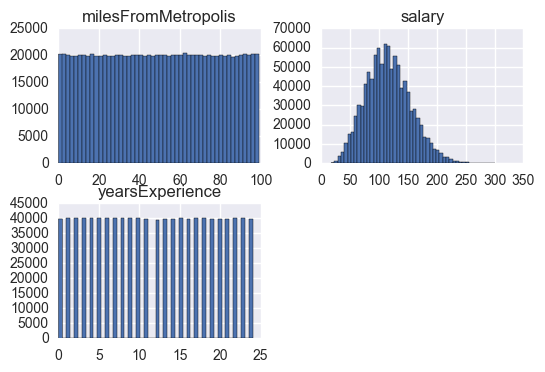

In [18]:
df_train.hist(bins=50,figsize=(6,4));

((array([-4.82696413, -4.6471812 , -4.549983  , ...,  4.549983  ,
          4.6471812 ,  4.82696413]),
  array([ 17,  18,  18, ..., 298, 301, 301], dtype=int64)),
 (38.559223104915397, 116.06239831199154, 0.99591598601991427))

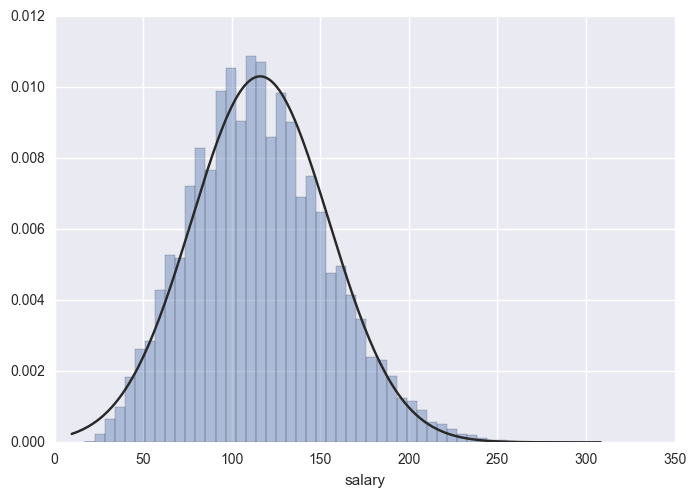

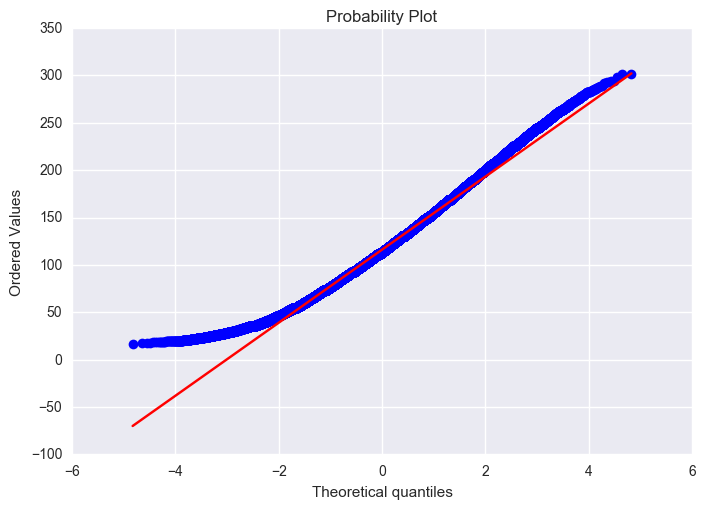

In [19]:
#histogram and normal distribution plot
sns.distplot(df_train.salary,kde=False,fit=stats.norm);
fig = plt.figure()
stats.probplot(df_train.salary,plot=plt)

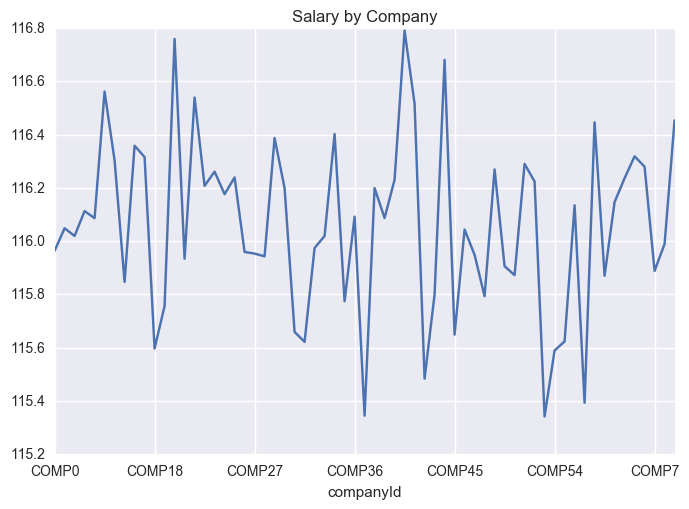

In [20]:
# Salary by Company
df_train.groupby('companyId').salary.mean().plot()
plt.title('Salary by Company')

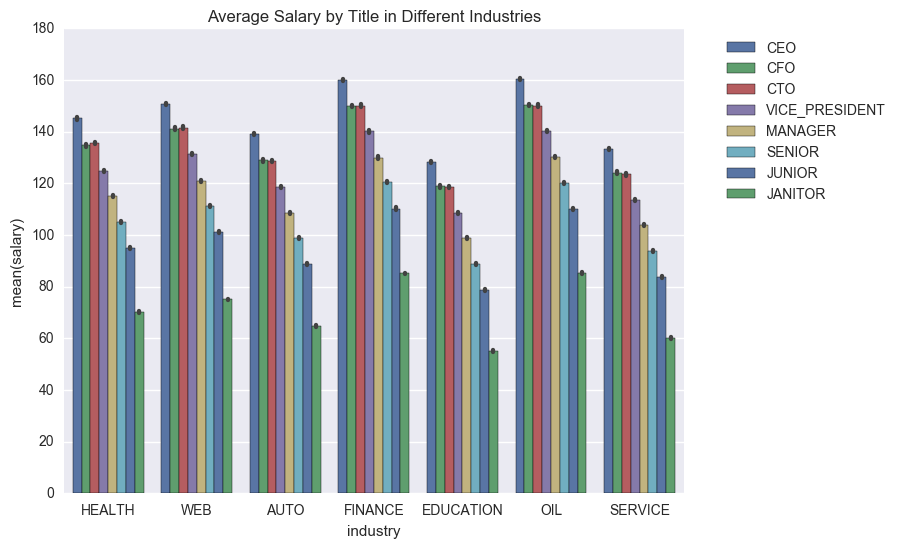

In [21]:
fig,ax = plt.subplots(figsize = (8,6))
sns.barplot(x='industry',y='salary',data=df_train,hue='jobType',
            hue_order=['CEO','CFO','CTO','VICE_PRESIDENT','MANAGER','SENIOR','JUNIOR','JANITOR'],
            palette=colors)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Average Salary by Title in Different Industries')

** By Industry, the salary difference is not big compared with job title **

** Salary in education is apparately lower than the other industry** 

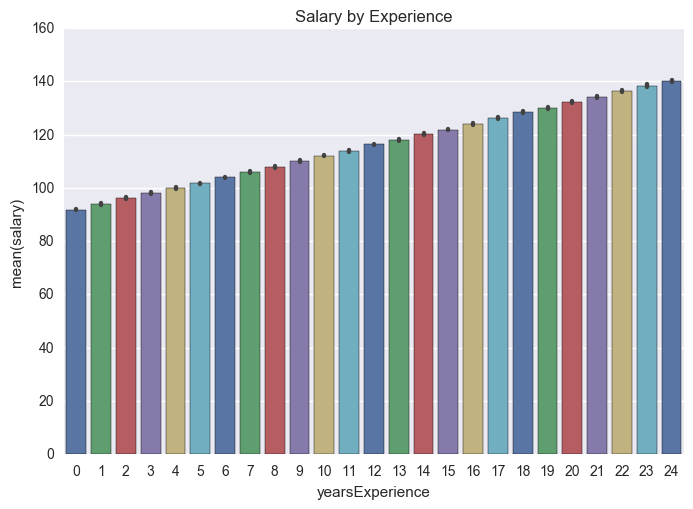

In [22]:
sns.barplot(x='yearsExperience',y='salary',data=df_train,palette=colors)
plt.title('Salary by Experience')

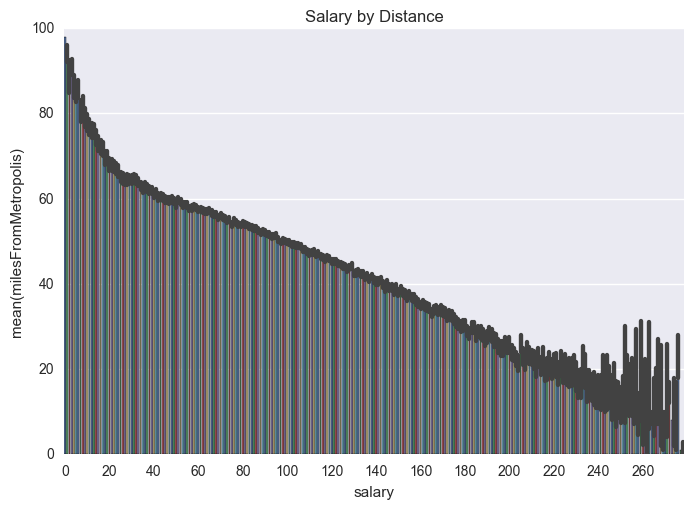

In [23]:
import matplotlib.ticker as ticker
ax = sns.barplot(y='milesFromMetropolis',x='salary',data=df_train,palette=colors)
plt.title('Salary by Distance')
ax.set_xlabel('salary')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))

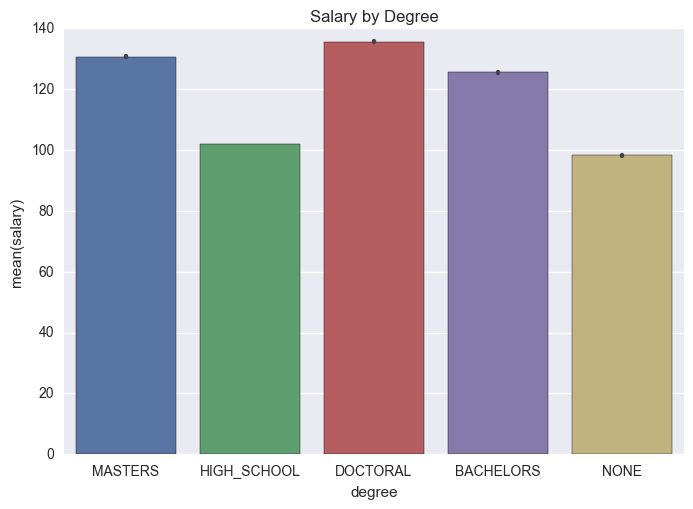

In [24]:
sns.barplot(x='degree',y='salary',data=df_train)
plt.title('Salary by Degree')

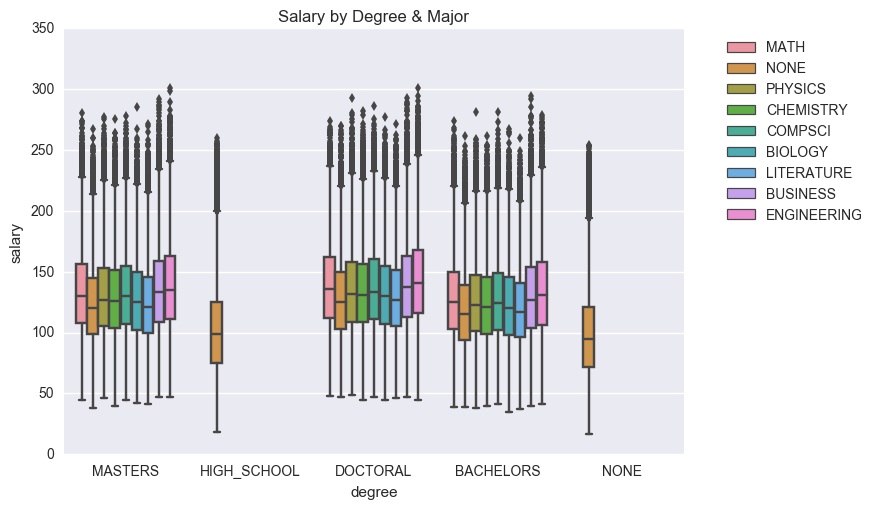

In [25]:
sns.boxplot(x='degree',y='salary',hue='major',data=df_train)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Salary by Degree & Major')

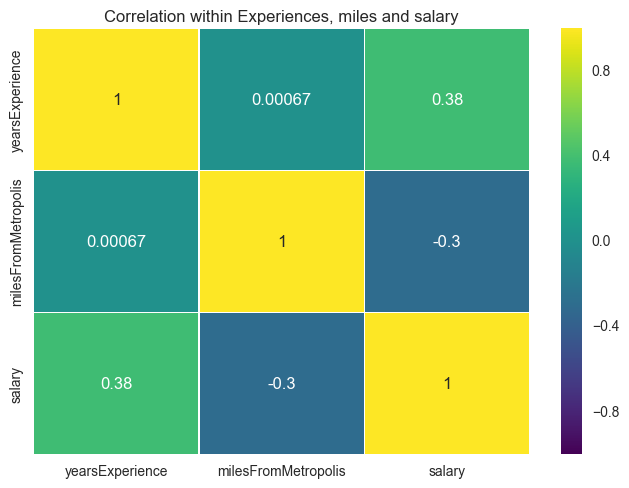

In [26]:
colormap = plt.cm.viridis
sns.heatmap(df_train.corr(method='pearson'),annot=True,cmap=colormap,linecolor='white',linewidths=0.1)
plt.title('Correlation within Experiences, miles and salary')

### Feature Engineering

In term of Indeed distance category, I create a new column: **distance**, which divides the milesFromMetropolis into:
* 0-5 miles: 0
* 6-10 miles: 1
* 11-15 miles: 2
* 16-25 miles: 3
* 26-50 miles: 4
* 51-100 miles: 5

In [27]:
df_train['type'] = 'train'
df_test_features['type'] = 'test'
df_combined = pd.concat([df_train,df_test_features])

In [28]:
df_combined['distance'] = np.where(df_combined.milesFromMetropolis<=5,0,
                               np.where(df_combined.milesFromMetropolis<=10,1,
                                       np.where(df_combined.milesFromMetropolis<=15,2,
                                               np.where(df_combined.milesFromMetropolis<=25,3,
                                                       np.where(df_combined.milesFromMetropolis<=50,4,5)))))

Based on **Average Salary by Title in Different Industries** bar plot above, CFO and CTO have nearly the same average salary.

The order of jobType salary: **CEO > CFO = CTO > Vice President > Manager > Senior > Junior > Janitor**

In [29]:
# Label categorical variable: jobTpye which contains information in its ordering set
jobType_dict={'CEO':6,'CFO':5,'CTO':5,'VICE_PRESIDENT':4,'MANAGER':3,'SENIOR':2,'JUNIOR':1,'JANITOR':0}

job_hier = pd.DataFrame(list(jobType_dict.items()),columns=['jobType','hierarchy'])

In [30]:
df_combined = df_combined.merge(job_hier)

In [31]:
df_combined.head()

,companyId,degree,industry,jobId,jobType,major,milesFromMetropolis,salary,type,yearsExperience,distance,hierarchy
0,COMP37,MASTERS,HEALTH,JOB1362684407687,CFO,MATH,83,130.0,train,10,5,5
1,COMP15,NONE,HEALTH,JOB1362684407693,CFO,NONE,24,178.0,train,23,3,5
2,COMP27,BACHELORS,AUTO,JOB1362684407712,CFO,CHEMISTRY,70,131.0,train,9,5,5
3,COMP0,BACHELORS,HEALTH,JOB1362684407718,CFO,PHYSICS,32,132.0,train,18,4,5
4,COMP7,BACHELORS,EDUCATION,JOB1362684407744,CFO,COMPSCI,25,140.0,train,15,3,5


### Model Creation 

* Get Dummy Variables

In [32]:
df_combined.drop(['companyId','jobType'],inplace=True,axis=1)

In [33]:
df_dummies = pd.get_dummies(df_combined,
                            columns=['degree','industry','major'],
                           drop_first=True)

In [34]:
df_dummies.shape

(1999995, 25)

In [35]:
# Seperate back training and testing data
df_train_dummies = df_dummies[df_dummies.type=='train']
df_test_dummies = df_dummies[df_dummies.type=='test']
df_train_dummies.drop(['jobId','type'],axis=1,inplace=True)
df_test_dummies.drop(['type','salary'],axis=1,inplace=True)

* Standardize

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
std_scaler = StandardScaler()

In [38]:
# Scale *yearsExperience* and *milesFromMetropolis*
warnings.filterwarnings('ignore')

df_train_dummies.yearsExperience = std_scaler.fit_transform(df_train_dummies.yearsExperience)
df_train_dummies.milesFromMetropolis = std_scaler.fit_transform(df_train_dummies.milesFromMetropolis)

df_test_dummies.yearsExperience = std_scaler.transform(df_test_dummies.yearsExperience)
df_test_dummies.milesFromMetropolis = std_scaler.transform(df_test_dummies.milesFromMetropolis)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Split Training data into train and validation
X_train,X_test,y_train,y_test = train_test_split(df_train_dummies.drop('salary',axis=1),df_train_dummies.salary,random_state=101)

* Lasso & Ridge

In [41]:
from sklearn.linear_model import Ridge, Lasso, LassoCV
from sklearn.model_selection import cross_val_score

In [42]:
# Apply KFold Cross Validation
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5))
    return rmse

* Ridge

In [43]:
alphas = [0.01,0.1,0.5,1,5,10,50]
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]

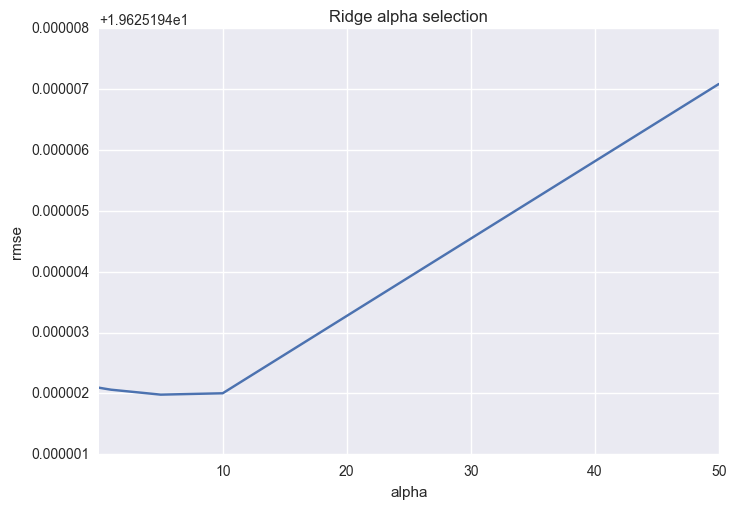

In [44]:
cv_ridge = pd.Series(cv_ridge,index=alphas)
cv_ridge.plot(title='Ridge alpha selection')
plt.xlabel('alpha')
plt.ylabel('rmse')

In [45]:
model_ridge = Ridge(alpha=0.5,random_state=1).fit(X_train,y_train)

In [46]:
ridge_predict = model_ridge.predict(X_test)

In [47]:
# Mean Absolute Error
def mae(test,prediction):
    return (np.abs(test-prediction)).mean()

In [48]:
print ('Ridge Mean Absolute Error:{:.4f}'.format(mae(y_test,np.round(ridge_predict,0))))

Ridge Mean Absolute Error:15.8314


* Lasso

In [49]:
alphas = [1,0.1,0.01,0.0001]
cv_lasso = [rmse_cv(Lasso(alpha=alpha)).mean() for alpha in alphas]

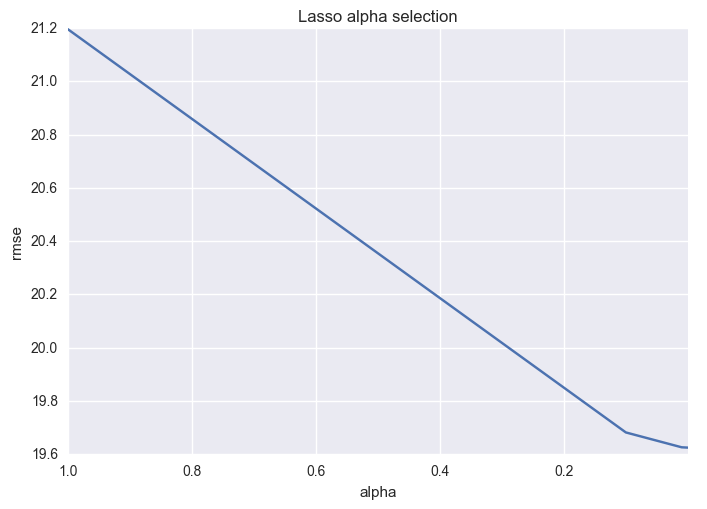

In [50]:
cv_lasso = pd.Series(cv_lasso,index=alphas)
cv_lasso.plot(title='Lasso alpha selection')
plt.xlabel('alpha')
plt.ylabel('rmse')

In [51]:
model_lasso = Lasso(alpha=0.0001,random_state=1).fit(X_train,y_train)

In [52]:
lasso_predict = model_lasso.predict(X_test)

In [53]:
print ('Lasso Mean Absolute Error:{:.4f}'.format(mae(y_test,np.round(lasso_predict,0))))

Lasso Mean Absolute Error:15.8315


In [54]:
lasso_cv = LassoCV(alphas=alphas).fit(X_train,y_train)

In [55]:
# Looks at the coefficients
coef = pd.Series(lasso_cv.coef_,index=X_train.columns)

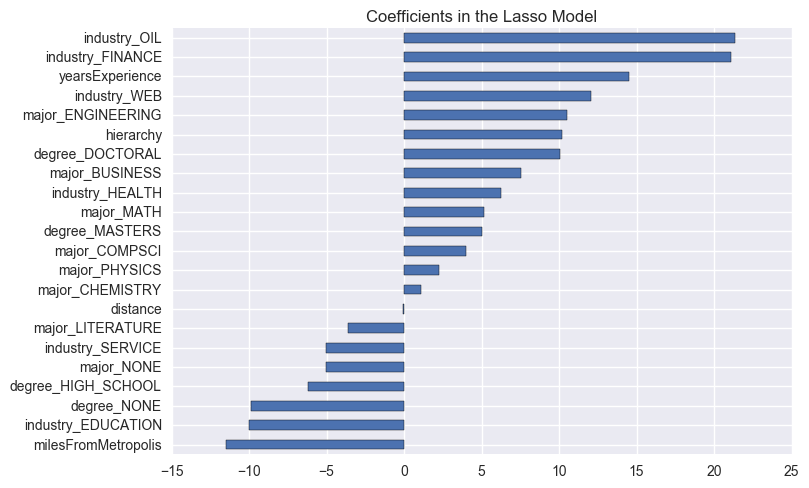

In [56]:
# Visualize Coefficients
coef.sort_values().plot(kind='barh')
plt.title('Coefficients in the Lasso Model')

* XGBoost

In [57]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.1.0-posix-seh-rt_v5-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [58]:
import xgboost as xgb

In [59]:
model_xgb = xgb.XGBRegressor(random_state=1)

In [60]:
cv_xgb = rmse_cv(model_xgb).mean()

* GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
#Tuning Parameters
param_grid = {'max_depth':[3,5],
              'n_estimators':[100,150],
              'learning_rate':[0.1,0.01]}

In [63]:
grid_model_xgb = GridSearchCV(model_xgb,param_grid=param_grid,scoring='neg_mean_squared_error',cv=3)

In [64]:
grid_model_xgb.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [65]:
#Best parameters
grid_model_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

In [66]:
print ('XGB RMSE:{:.4f}'.format(np.sqrt(-grid_model_xgb.best_score_)))

XGB RMSE:18.9282


In [67]:
#Re_train XGB with the best parameters combination
model_xgb = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=150,random_state=1)

In [68]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=1, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
       subsample=1)

In [69]:
xgb_predict = model_xgb.predict(X_test)

In [70]:
print ('XGB Mean Absolute Error:{:.4f}'.format(mae(y_test,np.round(xgb_predict,0))))

XGB Mean Absolute Error:15.3309


In [71]:
features_importance = pd.Series(model_xgb.feature_importances_,index=X_train.columns)

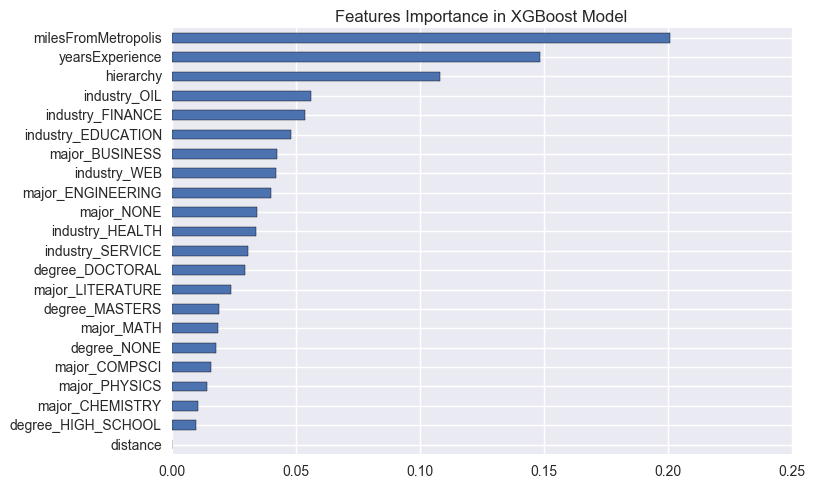

In [72]:
features_importance.sort_values().plot(kind='barh')
plt.title('Features Importance in XGBoost Model')

### Output

**Final Model: Ridge**

* **Predictors & Target**: In term of EDA, predictors apparently have linear relationship with salary. And it is easier to explain the relationship between predictors and salary;
* **Performance**: Compared with XGBoost, the performance of RIdge regression is not far away from XGBoost;
* **Computing Speed**: Ridge is running much faster than XGBoost and other ensemble model.

In [73]:
final_ridge = Ridge(alpha=0.5).fit(df_train_dummies.drop('salary',axis=1),df_train_dummies.salary)

In [74]:
output_prediction = np.round(final_ridge.predict(df_test_dummies.drop('jobId',axis=1)),0)

In [75]:
sub=pd.DataFrame()
sub['jobId']=df_test_dummies['jobId']
sub['salary']=output_prediction

In [76]:
sub.to_csv('test_salaries.csv',index=False)